# 📊 Stage 1: Data Collection and Exploration

**Welcome to the first stage of your deep learning journey!** In this notebook, we'll lay the foundation for our image classification project by acquiring and thoroughly understanding our dataset. A deep understanding of the data is crucial for building effective models.

### 🎯 Objectives for this Stage:

- **Download and Load**: Use `torchvision` to efficiently acquire the CIFAR-10 dataset.
- **Explore Structure**: Understand the dataset's components, size, and format.
- **Visualize Samples**: Look at images from each class to build intuition about the data.
- **Analyze Distribution**: Check the balance of classes to identify potential biases.

### 🔍 Why This Stage Matters

The principle of **"Garbage in, garbage out"** is fundamental in machine learning. The quality of our model is capped by the quality of our data. By meticulously analyzing the dataset now, we can:

- Make informed decisions about data preprocessing and augmentation.
- Identify and mitigate potential issues early on.
- Develop a strong intuition for the classification challenge ahead.

---

**Let's begin by setting up our environment and importing the necessary tools!** 🚀

## 1. Setup: Importing Libraries and Preparing the Environment

First, we'll import the essential libraries for data handling, visualization, and file operations. We'll also create the necessary directories to store our raw data, ensuring our project stays organized.

In [1]:
# Standard libraries for data manipulation and visualization
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os

# Custom script for handling the download process
from scripts.data_download import download_and_extract_cifar10_data, download_and_extract_cifar100_data

# Create the directory for our raw data if it doesn't already exist
print("Preparing data directory...")
os.makedirs("data/raw", exist_ok=True)
print("Setup complete.")


Preparing data directory...
Setup complete.


## 2. Data Acquisition: Downloading the CIFAR-10 Dataset

Now that our environment is ready, let's download the CIFAR-10 dataset. We are using a helper function from our `scripts` directory which handles the download and initial loading into PyTorch `Dataset` objects. This will provide us with two separate datasets: one for training our model and one for testing its performance.

In [2]:
train_dataset, test_dataset = download_and_extract_cifar10_data()
# train_dataset, test_dataset = download_and_extract_cifar100_data()

print(f"Training dataset contains {len(train_dataset)} images.")
print(f"Test dataset contains {len(test_dataset)} images.")


INFO:scripts.data_download:Loading CIFAR-10 training dataset...
100.0%
INFO:scripts.data_download:Loading CIFAR-10 test dataset...
INFO:scripts.data_download:
INFO:scripts.data_download:✅ CIFAR-10 Dataset Loaded Successfully!
INFO:scripts.data_download:==================================================
INFO:scripts.data_download:📊 Dataset Statistics:
INFO:scripts.data_download:   • Training samples: 50,000
INFO:scripts.data_download:   • Test samples: 10,000
INFO:scripts.data_download:   • Total samples: 60,000
INFO:scripts.data_download:   • Image size: 32x32 pixels
INFO:scripts.data_download:   • Color channels: 3 (RGB)
INFO:scripts.data_download:   • Number of classes: 10
INFO:scripts.data_download:   • Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
INFO:scripts.data_download:==================================================
INFO:scripts.data_download:Saving training images...
INFO:scripts.data_download:Saving test images...
INFO:scripts.data_download

Training dataset contains 50000 images.
Test dataset contains 10000 images.


## 3. Exploratory Data Analysis (EDA)

With the data loaded, our next step is to explore it. EDA helps us understand the characteristics of our dataset, which is vital for building an effective model.

### 3.1. Visualizing Image Samples

Let's visualize a few random images from our training set along with their corresponding labels. This gives us a qualitative feel for the image quality, object variety, and overall complexity of the classification task.

Displaying a random batch of 8 images from the training set:


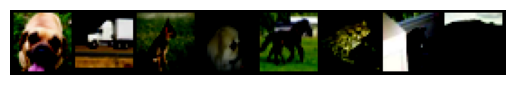

Labels:  dog        truck      dog        dog        horse      frog       cat        deer      


In [3]:
# Define the classes in the CIFAR-10 dataset
classes = train_dataset.classes

def imshow(img):
    """Helper function to un-normalize and display an image."""
    # The ToTensor transform scales images to [0,1], we'll display them as such
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Create a DataLoader to fetch a small batch of random training images
data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
images, labels = next(iter(data_loader))

# Show the images in a grid
print("Displaying a random batch of 8 images from the training set:")
imshow(torchvision.utils.make_grid(images))

# Print the corresponding labels
print('Labels: ', ' '.join(f'{classes[labels[j]]:10s}' for j in range(8)))


### 3.2. Analyzing Class Distribution

Next, let's check if the dataset is **balanced**. A balanced dataset has a roughly equal number of samples for each class. If a significant imbalance exists, a model might become biased towards the more frequent classes. We'll plot the number of images per class for both the training and test sets.

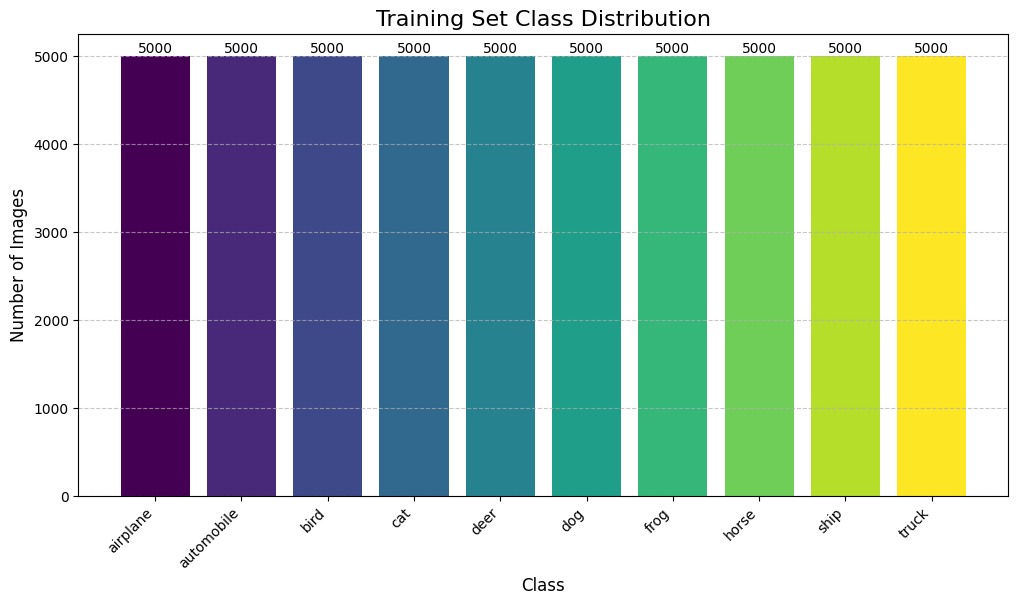

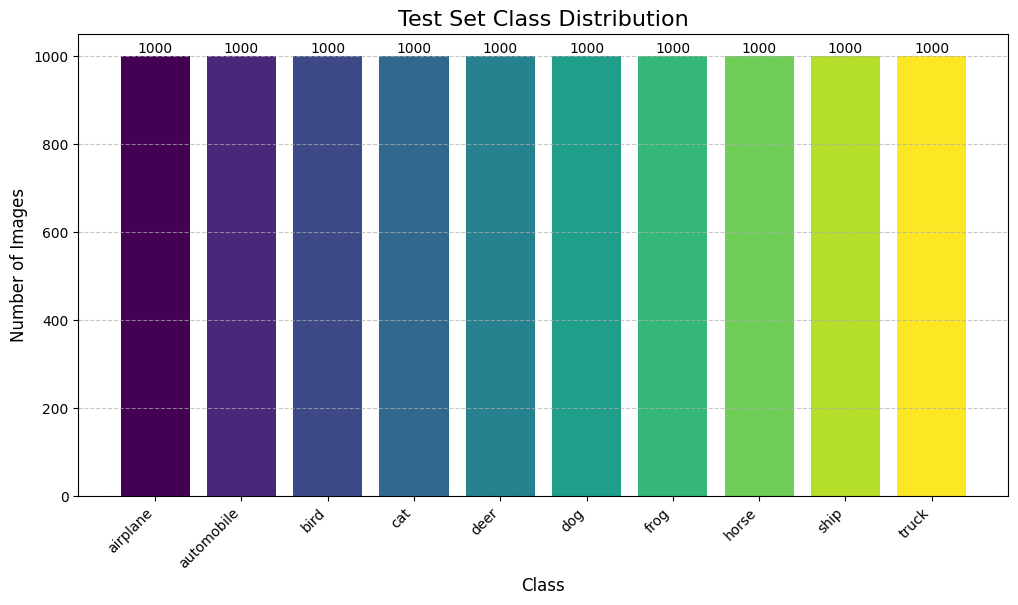

In [4]:
def plot_class_distribution(dataset, title):
    """Calculates and plots the distribution of classes in a dataset."""
    # Count occurrences of each class
    class_counts = {class_name: 0 for class_name in classes}
    # The targets attribute in torchvision datasets holds the labels
    for label in dataset.targets:
        class_counts[classes[label]] += 1

    class_names = list(class_counts.keys())
    counts = list(class_counts.values())

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(class_names, counts, color=plt.cm.viridis(np.linspace(0, 1, len(classes))))
    plt.title(title, fontsize=16)
    plt.ylabel("Number of Images", fontsize=12)
    plt.xlabel("Class", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

    plt.show()

# Plot for both training and test sets
plot_class_distribution(train_dataset, "Training Set Class Distribution")
plot_class_distribution(test_dataset, "Test Set Class Distribution")


**Observation:** The plots confirm that the CIFAR-10 dataset is perfectly balanced, with exactly 5,000 training images and 1,000 testing images per class. This is excellent, as it means we don't need to worry about class imbalance techniques like oversampling or weighted loss functions.

## ✅ Stage 1 Complete: Next Steps

Excellent work! We have successfully completed the first stage of our project.

**What we've accomplished:**
1.  **Set up** our environment and libraries.
2.  **Downloaded** and loaded the CIFAR-10 training and test datasets.
3.  **Visualized** sample images to understand their content and quality.
4.  **Analyzed** the class distribution and confirmed that the dataset is balanced.

With this solid foundation, we are now ready to move on to **Stage 2: Data Preprocessing**, where we will prepare this raw data for training our neural network.